<img src="https://pm1.narvii.com/5887/02b61b74eaec1060b56a3fcfed42ecc24a457a2e_hq.jpg">

In this hands-on, we will use the Marvel dataset to practice using different plots to visualize distributions of values between groups. You are free to come up with you own questions and use one of the categorical plots to help answer each question. You are also free to build your own dataframe that contains a specific subset of the data to help you answer your questions.

The dataset is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv

Data source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

| Variable |	Definition |
| :------- | :-
|page_id|	The unique identifier for that characters page within the wikia
|name|	The name of the character
|urlslug|	The unique url within the wikia that takes you to the character
|ID|	The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
|ALIGN|	If the character is Good, Bad or Neutral
|EYE|	Eye color of the character
|HAIR|	Hair color of the character
|SEX|	Sex of the character (e.g. Male, Female, etc.)
|GSM|	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
|ALIVE|	If the character is alive or deceased
|APPEARANCES|	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
|FIRST APPEARANCE|	The month and year of the character's first appearance in a comic book, if available
|YEAR|	The year of the character's first appearance in a comic book, if available

## Q1. How big is this dataset?
Use pandas to find out the number of rows and columns.

In [93]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv')
df.shape

(16376, 13)

## Q2. Strip plots
Come up with a question using this dataset and use a `strip` plot to help answer the question. State your question in a markdown cell. Recall that a `strip` plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

What is the distribution of the number of appearances of characters by their gender?

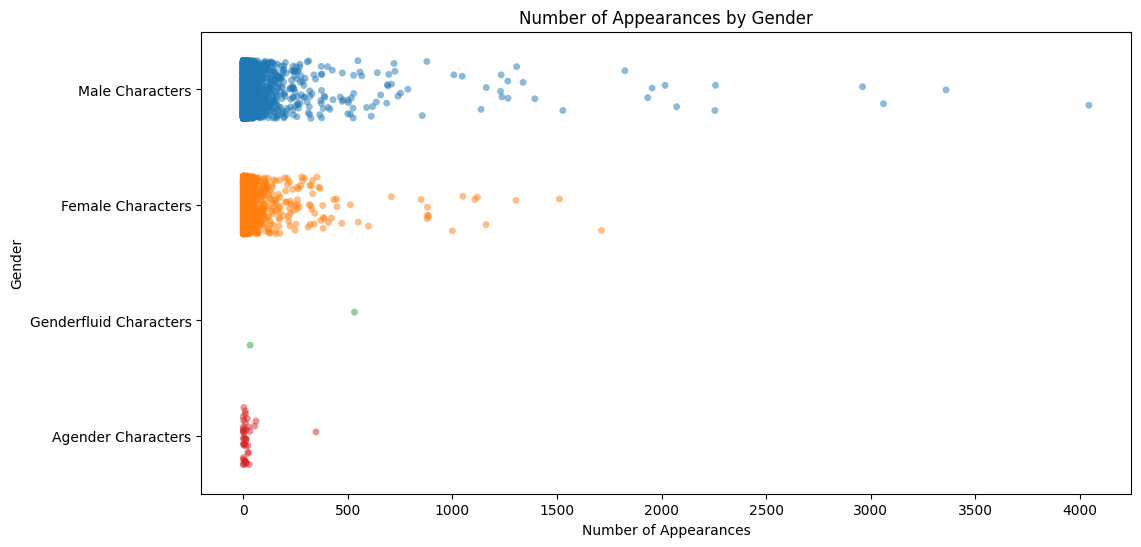

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clean = df.dropna(subset=['SEX', 'APPEARANCES'])

plt.figure(figsize=(12,6))
sns.stripplot(data=df_clean, x='APPEARANCES', y='SEX', hue='SEX', jitter=0.25, alpha=0.5)
plt.title('Number of Appearances by Gender')
plt.xlabel('Number of Appearances')
plt.ylabel('Gender')
plt.show()

## Q3. Multiples of Strip plots
Come up with a question using this dataset and use a strip plot that contains multiples (splitting the plot into multiples by a category that has two or more unique values) by using the `row` or `col` argument. State your question in a markdown cell. Recall that a strip plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

How does the number of appearances by gender vary between good, neutral, and bad characters?

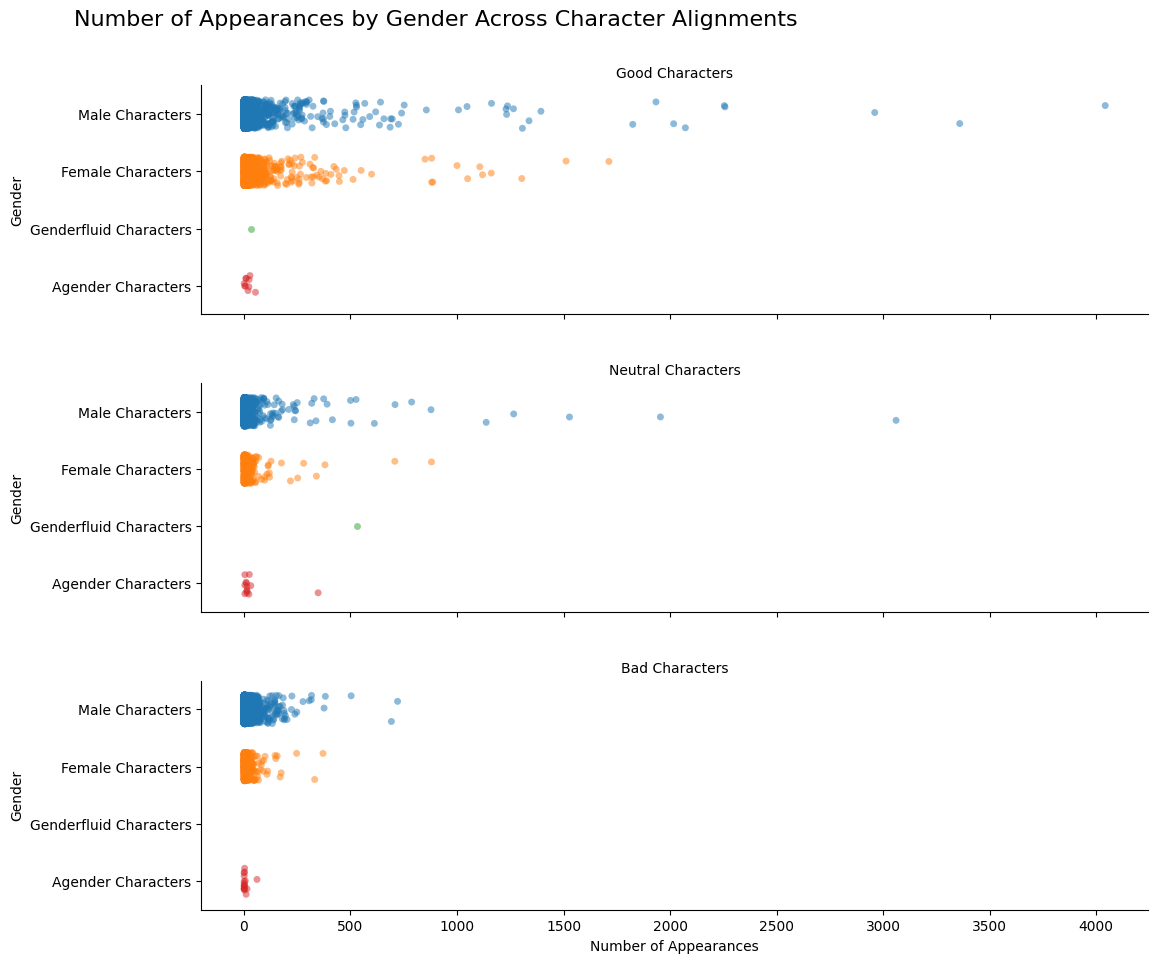

In [95]:
df_clean = df.dropna(subset=['SEX', 'ALIGN', 'APPEARANCES'])
alignments = ['Good Characters', 'Bad Characters', 'Neutral Characters']
df_alignment = df_clean[df_clean['ALIGN'].isin(alignments)]

g = sns.catplot(
    data=df_alignment,
    x='APPEARANCES',
    y='SEX',
    row='ALIGN',
    kind='strip',
    height=6,
    aspect=1,
    jitter=0.25,
    alpha=0.5,
    hue='SEX'
)

g.fig.suptitle('Number of Appearances by Gender Across Character Alignments', fontsize=16)
g.fig.subplots_adjust(top=0.9, hspace=0.3)
g.set_titles('{row_name}')
g.set_axis_labels('Number of Appearances', 'Gender')
g.fig.set_size_inches(15, 9.5)
plt.show()

## Q4. Swarm plot
Come up with a question using this dataset and use a `swarm` plot to help answer the question. State your question in a markdown cell. Recall that a `swarm` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

What is the distribution of first appearance years among characters by their Gender/Sexual Minority (GSM) status?

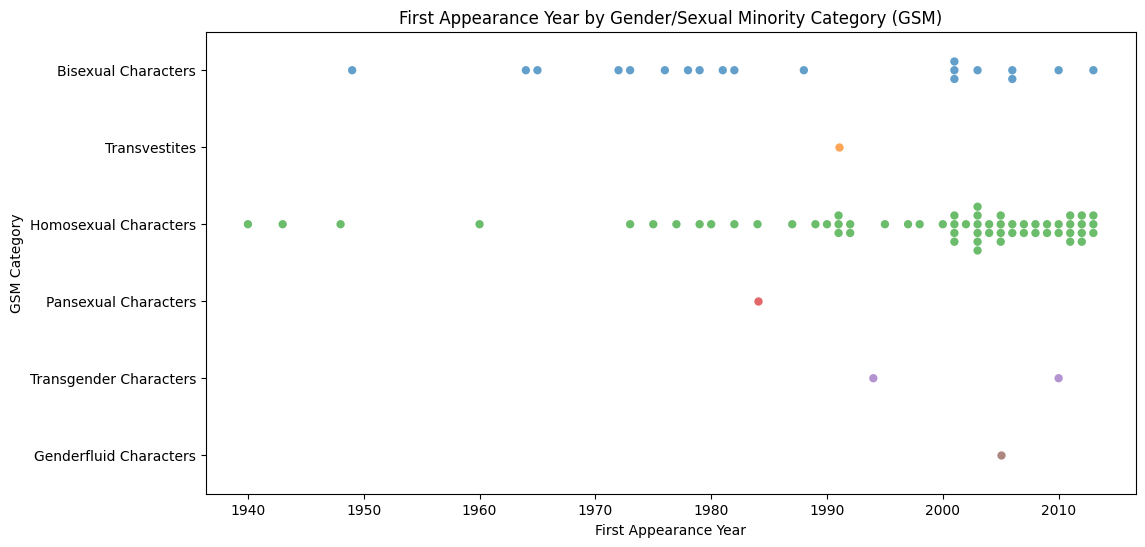

In [96]:
df_clean = df.dropna(subset=['GSM', 'Year'])

plt.figure(figsize=(12,6))
sns.swarmplot(data=df_clean, x='Year', y='GSM', alpha=0.7, size=6, hue='GSM')
plt.title('First Appearance Year by Gender/Sexual Minority Category (GSM)')
plt.xlabel('First Appearance Year')
plt.ylabel('GSM Category')
plt.show()

## Q5. Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the `swamp` plot into a `box` plot by simply changing the kind argument to `kind="box"`. Convert the swarm plot that you created in Q4 with a boxplot here. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

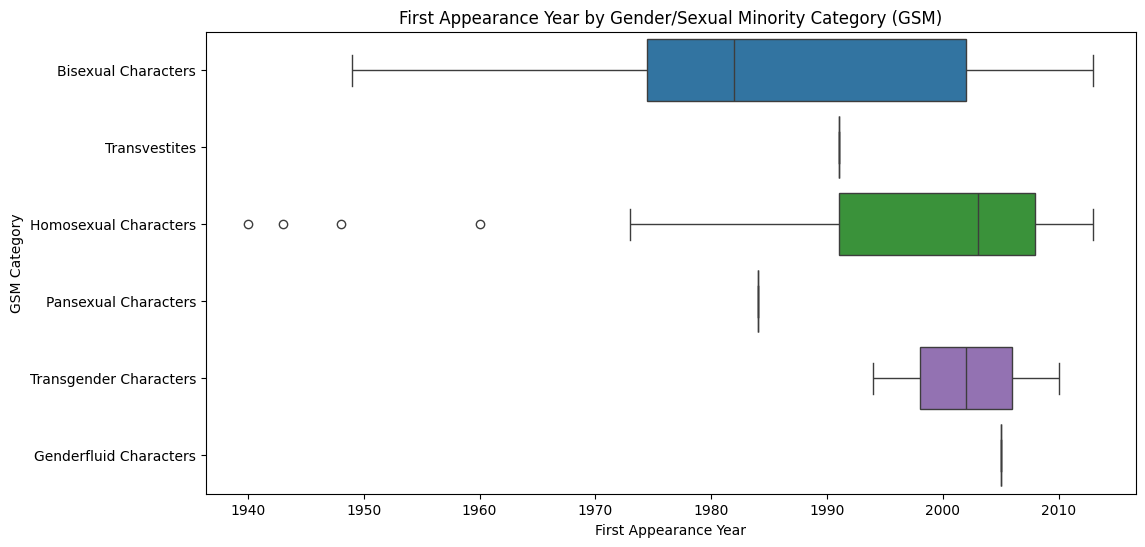

In [97]:
df_clean = df.dropna(subset=['GSM', 'Year'])

plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x='Year', y='GSM', hue='GSM')
plt.title('First Appearance Year by Gender/Sexual Minority Category (GSM)')
plt.xlabel('First Appearance Year')
plt.ylabel('GSM Category')
plt.show()

## Q6. Violin plots
Come up with a question using this dataset and use a `violin` plot to help answer the question. State your question in a markdown cell. Recall that a `violin` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. You might want to set setting `cut` to zero if the distribution spreads beyond the values of the data in the dataset. Be sure to include a meaning title for the plot.

What is the distribution of first appearance years by character alignment (Good, Bad, Neutral)?

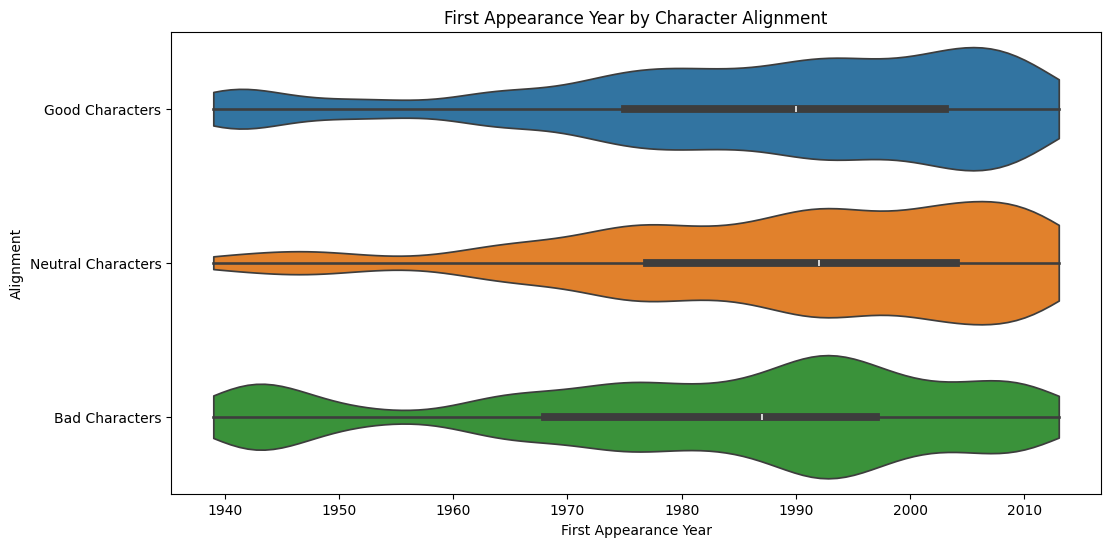

In [98]:
df_clean = df.dropna(subset=['ALIGN', 'Year'])

plt.figure(figsize=(12,6))
sns.violinplot(data=df_clean, x='Year', y='ALIGN', hue='ALIGN', cut=0)
plt.title('First Appearance Year by Character Alignment')
plt.xlabel('First Appearance Year')
plt.ylabel('Alignment')
plt.show()

## Bonus:
Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`. Try to create a violin plot using the `split` parameter. You will need to come up with a dataframe using this dataset with data that has two categories.

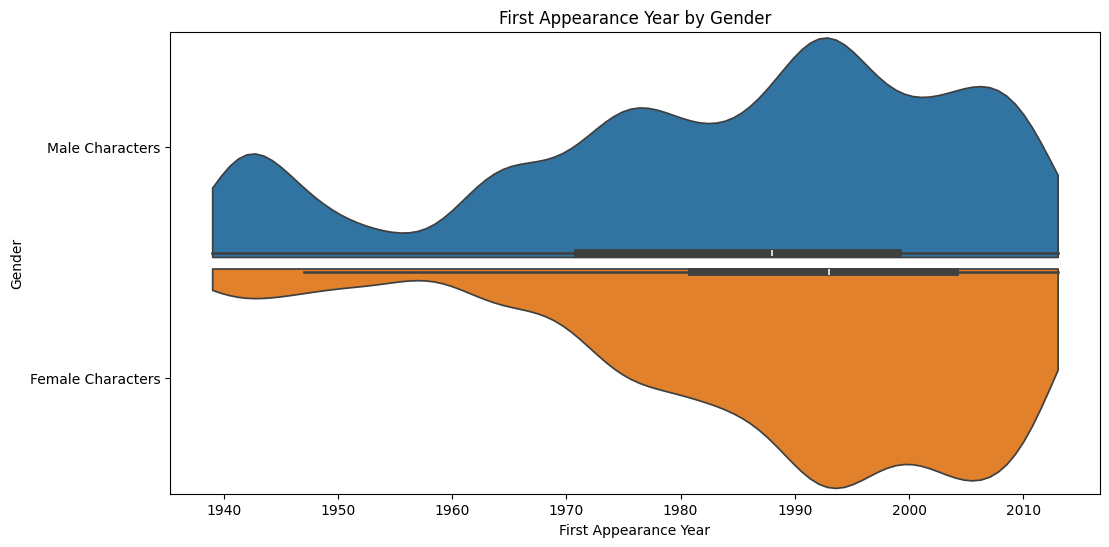

In [99]:
df_clean = df.dropna(subset=['SEX', 'Year'])

df_mf = df_clean[df_clean['SEX'].isin(['Male Characters', 'Female Characters'])]

plt.figure(figsize=(12,6))
sns.violinplot(
    data=df_mf,
    x='Year',
    y='SEX',
    hue='SEX',
    split=True,
    cut=0,
    width=0.95
)
plt.title('First Appearance Year by Gender')
plt.xlabel('First Appearance Year')
plt.ylabel('Gender')
plt.show()
